# Test Classification

Binary classification of movie reviews.

In [30]:
import random

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'1.10.0'

In [31]:
NUM_EPOCHS = 40
VALIDATION_LIMIT = 10000
VOCAB_SIZE = 10000

## Load Dataset

Included IMDB dataset of movie reviews.

In [4]:
imdb = keras.datasets.imdb
# limit data to 10,000 most common words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

## Explore Dataset

In [5]:
len(train_data), len(test_data)

(25000, 25000)

In [9]:
random_index = random.randint(0, len(train_data))
# each number corresponds to a certain word
print(train_data[random_index])

[1, 14, 20, 9, 44, 6, 1002, 2, 9604, 2, 269, 8, 1277, 6, 1165, 1096, 3036, 2, 2, 37, 2, 35, 5473, 1169, 2854, 34, 6, 1480, 8592, 691, 845, 2464, 4, 1002, 497, 4, 3036, 820, 694, 98, 7828, 14, 20, 2380, 34, 2252, 485, 156, 307, 485, 524, 5, 52, 370, 665, 7, 2579, 1991, 139, 66, 47, 57, 2327, 33, 32, 45, 32, 3174, 5, 4, 3174, 946, 461, 753, 99, 13, 416, 32, 4993, 6, 840, 7, 4, 96, 83, 4, 20, 5, 50, 9, 57, 1653, 489, 103, 15, 549, 18, 4, 627, 63, 272, 52, 64, 1133, 319, 14, 20, 48, 25, 70, 81, 38, 18, 879, 82, 1133, 5564, 149, 4, 20, 891, 234, 83, 4, 20, 88, 45, 32, 4, 172, 8, 4, 130, 357, 1086, 158]


In [11]:
# word index maps words to numbers
word_index = imdb.get_word_index()
# first 3 are reserved things
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])

# helper method to do reverse lookup
def decode_review(numbers):
    return ' '.join([reverse_word_index.get(i, '<???>') for i in numbers])

In [13]:
# decode a random review
random_index = random.randint(0, len(train_data))
decode_review(train_data[random_index])

'<START> an absolutely wretched waste of film nothing ever happens no ghosts hardly any train no mystery no interest the constant and brutal attempts at comedy are painful everything else is pathetic the premise is idiotic a bunch of people stranded in the middle of no place because their train was held up for less than 3 minutes what and the <UNK> leaves them no place to stay in a heavy storm i think not oh they can walk 4 miles across the dead black fields <UNK> yeah sure or they can force themselves on the <UNK> <UNK> and stay at the <UNK> train station a station which proved to be nothing but deadly boring utterly without ghosts interest or plot br br so very terribly dull that this seems impossible br br this ought to be added to the lost films list <UNK>'

## Prepare Data

The data must be manipulated to work with a neural network.

In [14]:
# pad arrays so they all have the same length
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)
# do the same thing to test data
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)

In [16]:
random_index = random.randint(0, len(train_data))
len(train_data[random_index])

256

In [17]:
random_index = random.randint(0, len(train_data))
decode_review(train_data[random_index])

"<START> this was on the <UNK> <UNK> dvd for blazing <UNK> itself brilliant but not this nowhere did i see mel <UNK> name on here and i can guess why he's got a lot more sense to not be associated with this pilot my <UNK> who would find this funny sure there may be a race issue but for me it just wasn't funny well cause it's simply not funny it's like the writers didn't even try to be funny just to cash in on being tied with blazing <UNK> did they expect this show to go for several seasons when they made this pilot flat out they didn't care it was a quick cash cow which thank god didn't cash out i guess it's useful for historical purposes only or only to demonstrate how stupid and unimaginative hollywood writers can be <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

## Build Model

In [20]:
model = keras.Sequential()
model.add(keras.layers.Embedding(VOCAB_SIZE, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compile model
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Create Validation Set


In [23]:
x_val = train_data[:VALIDATION_LIMIT]
partial_x_train = train_data[VALIDATION_LIMIT:]
y_val = train_labels[:VALIDATION_LIMIT]
partial_y_train = train_labels[VALIDATION_LIMIT:]

## Train Model


In [27]:
# store model fit process in history var
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=NUM_EPOCHS,
    validation_data=(x_val, y_val),
    verbose=1
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.1875 - acc: 0.9332 - val_loss: 0.2911 - val_acc: 0.8844
Epoch 2/40
15000/15000 [==============================] - 1s 65us/step - loss: 0.1826 - acc: 0.9361 - val_loss: 0.2898 - val_acc: 0.8849
Epoch 3/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.1783 - acc: 0.9379 - val_loss: 0.2896 - val_acc: 0.8851
Epoch 4/40
15000/15000 [==============================] - 1s 63us/step - loss: 0.1740 - acc: 0.9404 - val_loss: 0.2890 - val_acc: 0.8858
Epoch 5/40
15000/15000 [==============================] - 1s 64us/step - loss: 0.1703 - acc: 0.9425 - val_loss: 0.2883 - val_acc: 0.8858
Epoch 6/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.1660 - acc: 0.9439 - val_loss: 0.2887 - val_acc: 0.8858
Epoch 7/40
15000/15000 [==============================] - 1s 63us/step - loss: 0.1625 - acc: 0.9461 - val_loss: 0.2885 - val_acc

In [26]:
model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 31us/step


[0.3060476396656036, 0.87516]

## Plot Model History

Create a graph of accuracy/loss over time

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

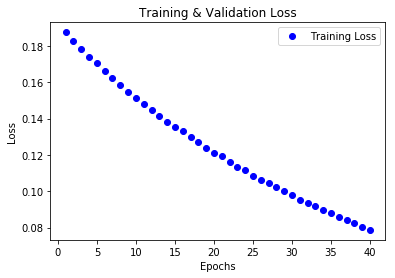

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")

plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

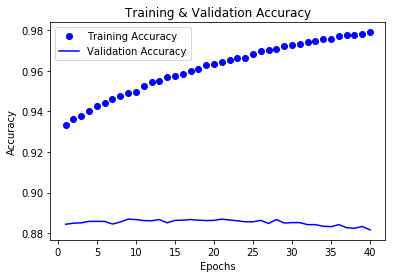

In [39]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()